Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Objective**:

The objective of this project is to conduct a comprehensive analysis of customer purchase behavior, with a specific focus on purchase amounts, in relation to customer gender during the Black Friday sales event at Walmart Inc. This study aims to provide valuable insights that can assist the management team at Walmart Inc. in making data-driven decisions.



**Dataset**:

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv

- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation(Masked)
- City_Category:	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status:	Marital Status
- ProductCategory:	Product Category (Masked)
- Purchase:	Purchase Amount


## Exploratory Data Analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
import matplotlib.cm as cm
warnings.filterwarnings('ignore')
import copy

In [ ]:
!gdown 10Cw1_fxLyTzEoQySQ0O48r4yVChHoKrY

Downloading...
From: https://drive.google.com/uc?id=10Cw1_fxLyTzEoQySQ0O48r4yVChHoKrY
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 27.0MB/s]


In [ ]:
df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Insights:
-  From the above analysis, it is clear that, data has total of 10 features with lots of mixed alpha numeric data.
- Apart from Purchase Column, all the other data types are of categorical type. We will change the datatypes of all such columns to category

In [ ]:
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
df.describe(include='category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


**Insights**

**1. User_ID**  
- Among `550,068` transactions, there are `5,891` unique user IDs, indicating that the same customers purchased multiple products.

**2. Product_ID**  
- Among `550,068` transactions, there are `3,631` unique products. The product with the code `P00265242` is the `highest seller`, with a maximum of `1,880 units` sold.

**3. Gender**  
- Out of `550,068` transactions, `414,259` (nearly `75%`) were made by males, highlighting a significant disparity in purchasing behavior between males and females during the Black Friday event.

**4. Age**  
- The dataset contains `7` unique age groups. The `26-35` age group recorded the highest number of transactions, totaling `219,587`. This feature will be analyzed further in detail.

**5. Stay_In_Current_City_Years**  
- Customers with `1` year of stay in their current city accounted for the highest number of transactions at `193,821`, compared to other customers with `0`, `2`, `3`, or `4+` years of stay.

**6. Marital_Status**  
- `59%` of total transactions were made by `Unmarried Customers`, while `41%` were made by `Married Customers`.


In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


Insights:
`The purchase amounts` vary widely, with the minimum recorded purchase being `$12` and the maximum reaching `$23961`. The `median` purchase amount of `$8047` is notably lower than the `mean` purchase amount of `$9264`, indicating a `right-skewed distribution` where a few high-value purchases pull up the mean

In [ ]:
df.duplicated().value_counts()

,count
False,550068


Insights:
There are no duplicate entries the data set.

In [ ]:
for i in df.columns:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*70)

Unique Values in User_ID column are :-
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
----------------------------------------------------------------------
Unique Values in Product_ID column are :-
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
----------------------------------------------------------------------
Unique Values in Gender column are :-
['F', 'M']
Categories (2, object): ['F', 'M']
----------------------------------------------------------------------
Unique Values in Age column are :-
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Cat

**Insights**
- The dataset does not contain any abnormal values.

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df['Marital_Status'].unique()

['Unmarried', 'Married']
Categories (2, object): ['Unmarried', 'Married']

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


Insights:
- The data set does not contain any null values

## Univariate Analysis

### Purchase Amount Distribution

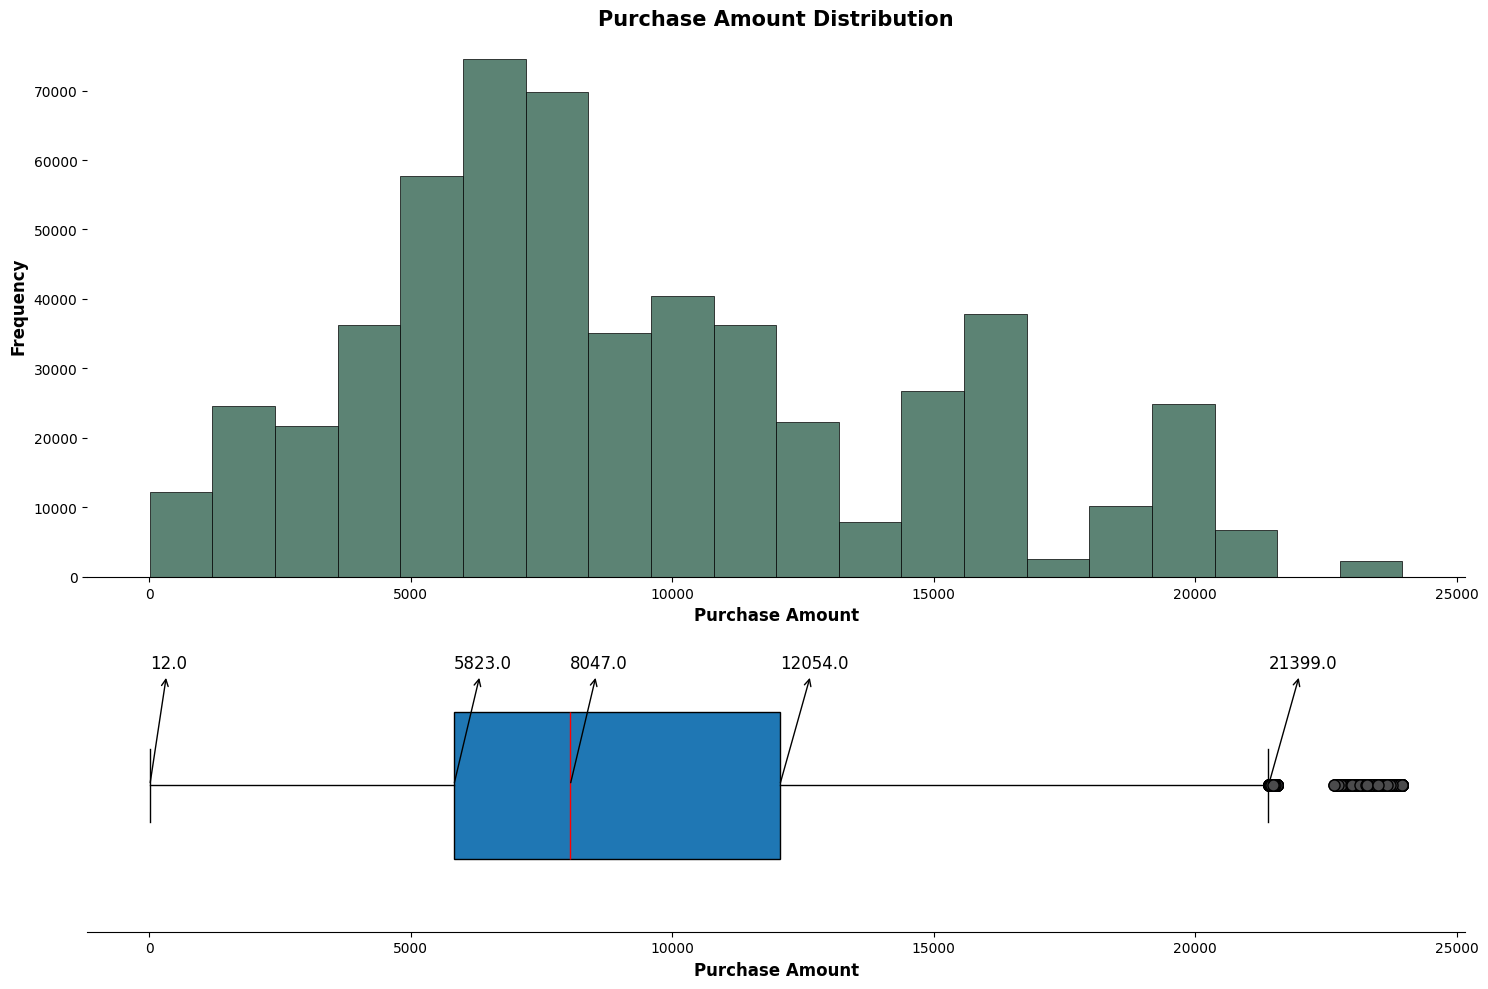

In [ ]:
#Purchase Amount Distribution

plt.figure(figsize=(15,10))
gs = plt.GridSpec(2,1, height_ratios=[0.65,0.35])

ax0 = plt.subplot(gs[0])
ax0.hist(df['Purchase'], color='#5C8374', linewidth=0.5, edgecolor='black', bins=20)
ax0.set_xlabel('Purchase Amount', fontsize=12, fontweight='bold')
ax0.set_ylabel('Frequency', fontsize=12, fontweight='bold')

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.set_title('Purchase Amount Distribution', fontdict={'size': 15, 'weight': 'bold'})

ax1 = plt.subplot(gs[1])
boxplot = ax1.boxplot(df['Purchase'], vert=False, patch_artist=True, widths=0.5)
boxplot['medians'][0].set_color('red')

for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor="#4b4b4c")

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

whiskers = [i.get_xdata() for i in boxplot['whiskers']]
median = df['Purchase'].quantile(0.5)

for i, j in whiskers:
    ax1.annotate(f"{i:.1f}", xy=(i, 1), xytext=(i, 1.4), fontsize=12,
                 arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))
    ax1.annotate(f"{j:.1f}", xy=(j, 1), xytext=(j, 1.4), fontsize=12,
                 arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

ax1.annotate(f"{median:.1f}", xy=(median, 1), xytext=(median + 1, 1.4), fontsize=12,
             arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

ax1.set_yticks([])
ax1.set_xlabel('Purchase Amount', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
len(df.loc[df['Purchase']>21399,'Purchase'] )

2677

**Insights**

**Outliers**
- There are a total of `2,677 outliers`, representing approximately `0.48%` of the total purchase amount data. We have decided not to remove these outliers, as they reflect a wide range of spending behaviors during the sale. This highlights the importance of customizing marketing strategies to cater to both regular and high-value customers, ultimately maximizing revenue.

**Distribution**
- The data indicates that most customers spent between `5,823 USD` and `12,054 USD`, with the `median` purchase amount being `8,047 USD`.
- The lower limit of `12 USD` and the upper limit of `21,399 USD` demonstrate substantial variability in customer spending.

### Categorical Variables

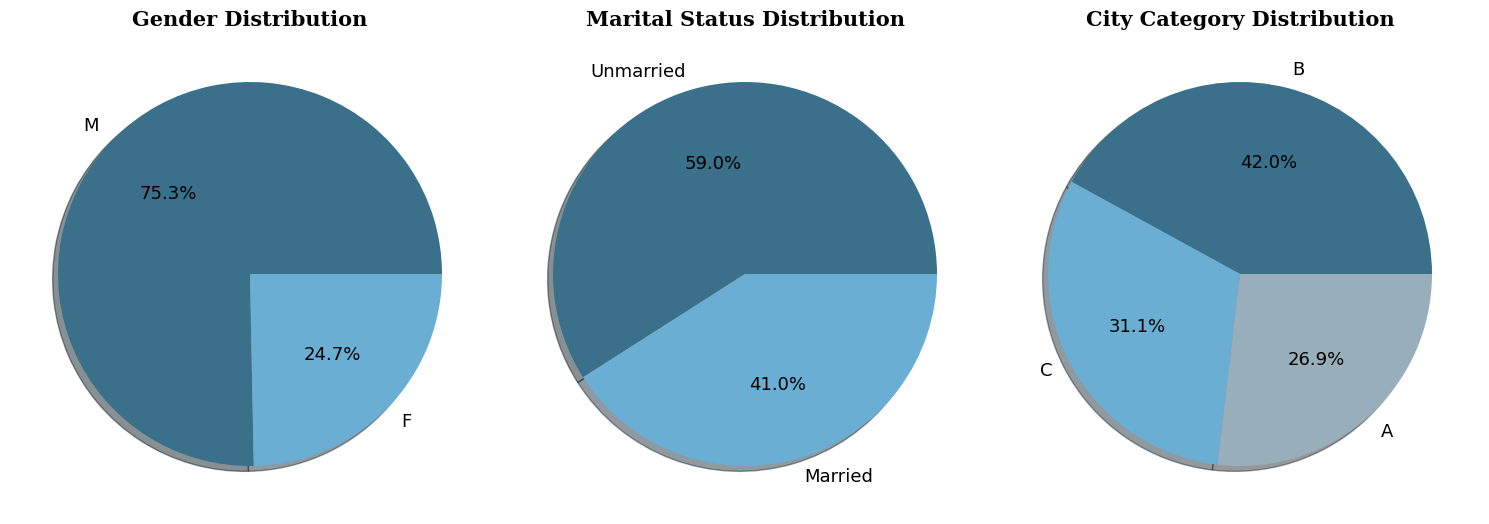

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,12))

ax0.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%.1f%%',
        shadow=True, colors=['#3A7089', '#6AAED4'], textprops={'fontsize': 13, 'color': 'black'})
ax0.set_title('Gender Distribution', fontdict={'font':'serif', 'size':15,'weight':'bold'})

ax1.pie(df['Marital_Status'].value_counts(), labels=df['Marital_Status'].value_counts().index,autopct='%.1f%%',
        shadow=True, colors=['#3A7089', '#6AAED4'], textprops={'fontsize': 13, 'color': 'black'})
ax1.set_title('Marital Status Distribution', fontdict={'font':'serif', 'size':15,'weight':'bold'})

ax2.pie(df['City_Category'].value_counts(), labels=df['City_Category'].value_counts().index,autopct='%.1f%%',
        shadow=True, colors=['#3A7089', '#6AAED4', '#99AEBB'], textprops={'fontsize': 13, 'color': 'black'})
ax2.set_title('City Category Distribution', fontdict={'font':'serif', 'size':15,'weight':'bold'})

plt.tight_layout()
plt.show()

**Insights**

**1. Gender Distribution** - The data reveals a notable difference in purchase behavior between male and female shoppers during the Black Friday event.

**2. Marital Status** - Since unmarried customers contribute a larger share of transactions, targeted marketing campaigns or promotions aimed at this group could be beneficial.

**3. City Category** - City B recorded the highest number of transactions, followed by City C and City A, respectively.

### Customer Age Distribution

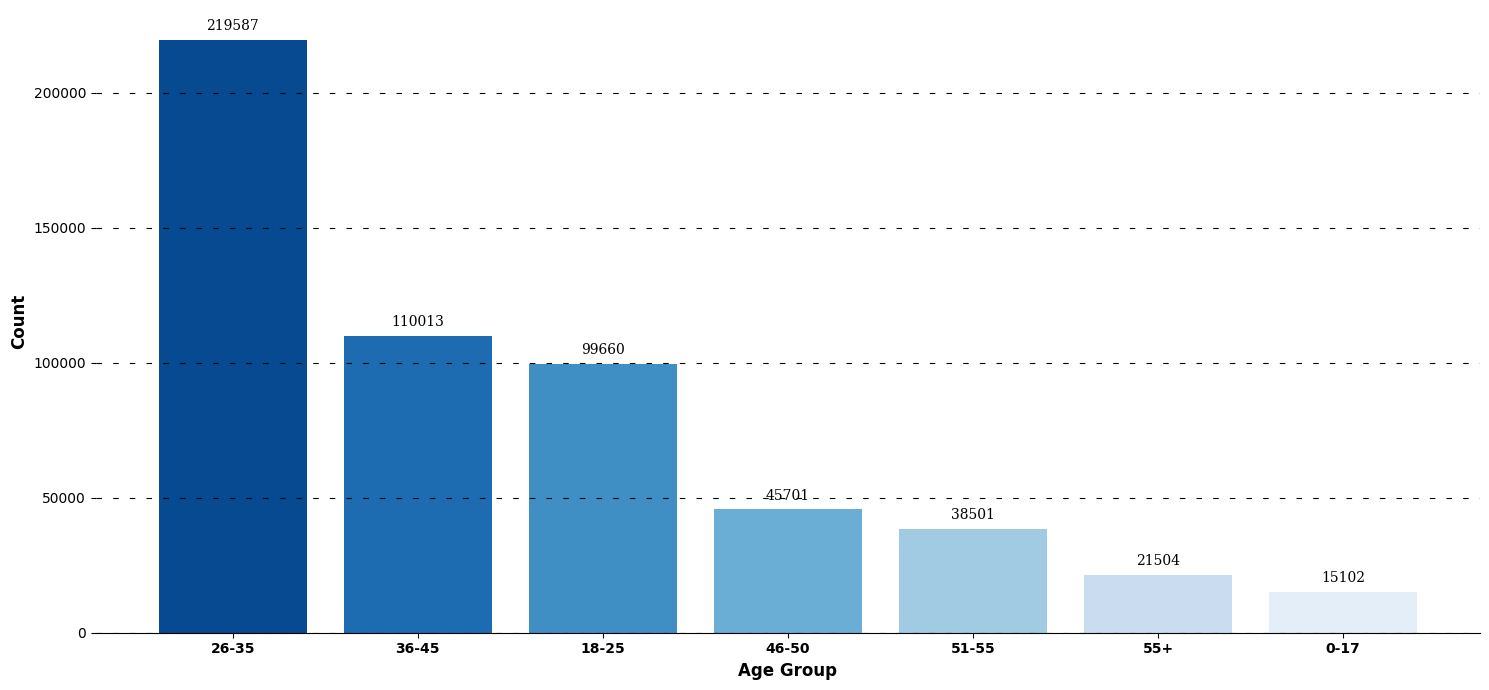

In [ ]:
fig, ax0 = plt.subplots(figsize=(15, 7))
temp = df['Age'].value_counts()

sorted_temp = temp.sort_values(ascending=False)

colors = cm.Blues(np.linspace(0.1, 0.9, len(sorted_temp)))[::-1]
ax0.bar(sorted_temp.index, sorted_temp.values, color=colors)

for i, v in enumerate(sorted_temp.values):
    ax0.text(i, v + 5000, str(v), {'font':'serif', 'size':10}, ha='center', va='center')

ax0.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5,10))

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.set_ylabel('Count', fontweight='bold', fontsize=12)
ax0.set_xlabel('Age Group', fontweight='bold', fontsize=12)
ax0.set_xticklabels(sorted_temp.index, fontweight='bold')

plt.tight_layout()
plt.show()

**Insights**:
- The `26-35` age group makes up the largest portion of Walmart's Black Friday sales, contributing `40%` of the total sales. This suggests that young and middle-aged adults are the `most engaged` and `motivated` when it comes to shopping for `deals and discounts`.

- The `36-45` and `18-25` age groups rank as the `second` and `third` largest segments, with 20% and 18% of the sales, respectively. This reflects Walmart's `broad customer base` spanning various life stages and preferences.

- The `46-50`, `51-55`, `55+`, and `0-17` age groups are the `smallest segments`, each representing less than `10%` of total sales. This suggests that Walmart may need to refine its marketing approaches and product offerings to attract more customers from these age groups, particularly seniors and children.

### Customer Stay in the Current City Distribution

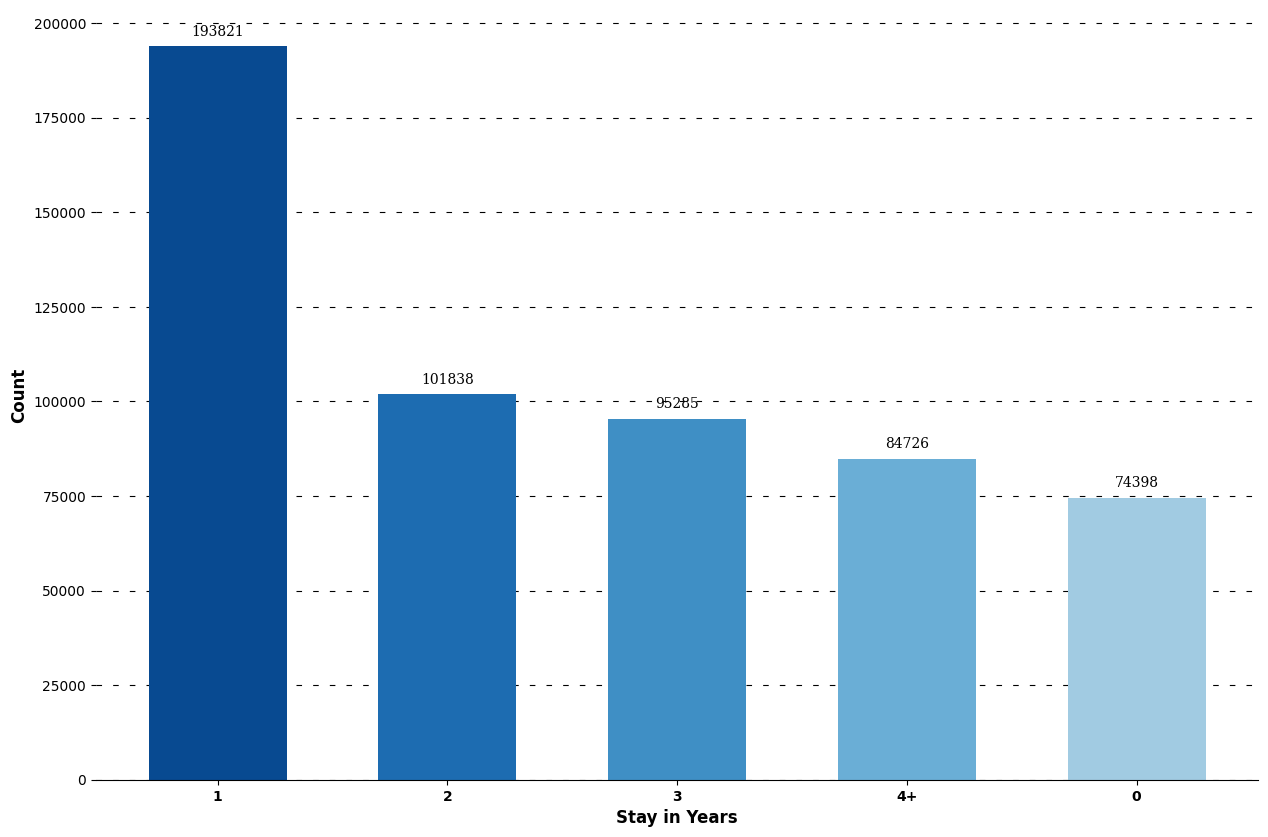

In [ ]:
#Customer Stay in the current city distribution
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(111)
temp = df['Stay_In_Current_City_Years'].value_counts()
ax1.bar(x=temp.index, height=temp.values,color = colors, zorder=2, width=0.6)

for i in temp.index:
    ax1.text(i, temp[i] + 4000, temp[i], {'font': 'serif', 'size': 10}, ha='center', va='center')

ax1.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

for s in ['top', 'left', 'right']:
    ax1.spines[s].set_visible(False)

ax1.set_ylabel('Count', fontweight='bold', fontsize=12)
ax1.set_xlabel('Stay in Years', fontweight='bold', fontsize=12)
ax1.set_xticklabels(temp.index, fontweight='bold')

plt.show()

**Insights**:
The data suggests that the customers are either new to the city or move frequently, and may have different preferences and needs than long-term residents.


- The majority of the customers `193821` have stayed in the current city for `one year or less`. This suggests that Walmart has a strong appeal to newcomers who may be looking for affordable and convenient shopping options.


- `4+ years` category customers indicates that Walmart has a `loyal customer base` who have been living in the same city for a long time.


- The percentage of customers `decreases` as the stay in the current city `increases` which suggests that Walmart may benefit from targeting long-term residents for `loyalty programs and promotions`.

### Top Ten Products

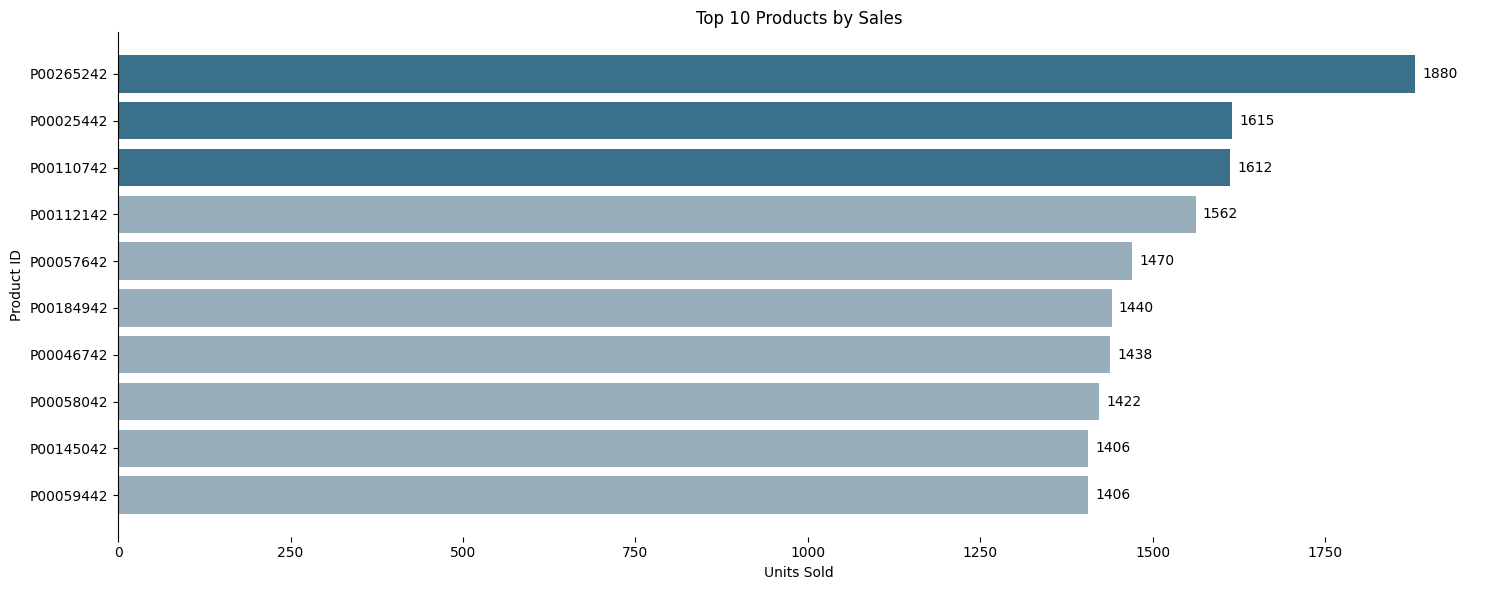

In [ ]:
fig = plt.figure(figsize=(15, 6))

temp_products = df['Product_ID'].value_counts().head(10)
temp_products = temp_products.iloc[::-1]
color_map =  ['#99AEBB' for i in range(7)] + ["#3A7089" for i in range(3)]
plt.barh(temp_products.index, temp_products.values, color=color_map)

for index, value in enumerate(temp_products.values):
    plt.text(value + 10, temp_products.index[index], str(value), va='center')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xlabel("Units Sold")
plt.ylabel("Product ID")
plt.title("Top 10 Products by Sales")

plt.tight_layout()
plt.show()



**Insights**:

**Top 10 Products Sold** - The top-selling products during Walmart's Black Friday sales are characterized by a `relatively small variation` in sales numbers, suggesting that Walmart offers a variety of products that many different customers like to buy

## Top Ten Product Categories

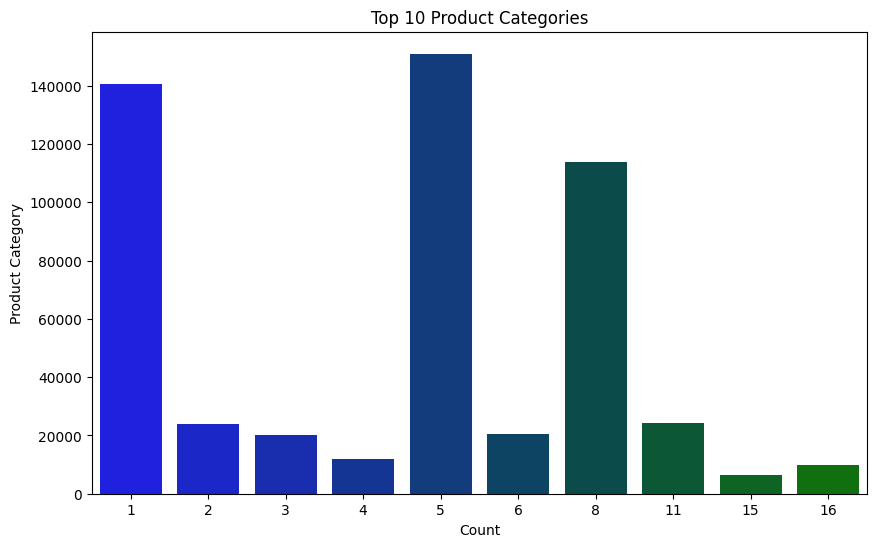

In [ ]:
top_product_categories = df['Product_Category'].value_counts().head(10)
categories, counts = zip(*top_product_categories.items())


plt.figure(figsize=(10, 6))
blue_green_palette = sns.blend_palette(["blue", "green"], n_colors=10)
sns.barplot(y=list(counts), x=list(categories), palette=blue_green_palette)

plt.title('Top 10 Product Categories')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

Insights:
**Top 10 Product Categories** - Categories `5, 1, and 8` have shown exceptional performance, collectively contributing to nearly `75%` of the total sales. This highlights a strong customer preference for these categories."

## Top Ten Customer Occupation

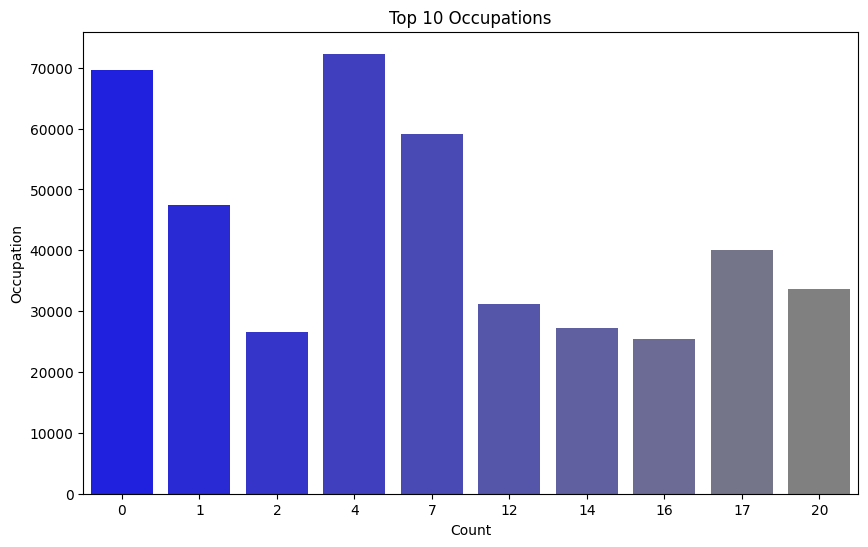

In [ ]:
top_occupations = df['Occupation'].value_counts().head(10)

occupations, counts = zip(*top_occupations.items())
plt.figure(figsize=(10, 6))
blue_green_palette = sns.blend_palette(["blue", "grey"], n_colors=10)
sns.barplot(y=list(counts), x=list(occupations), palette=blue_green_palette)
plt.title('Top 10 Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()


**Insights**: Customers in the Occupation categories 4, 0, and 7 accounted for nearly 37% of total purchases, indicating that these occupations either have a high demand for Walmart's products and services or possess greater disposable income to spend.

# Bivariate Analysis

## Purchase Patterns

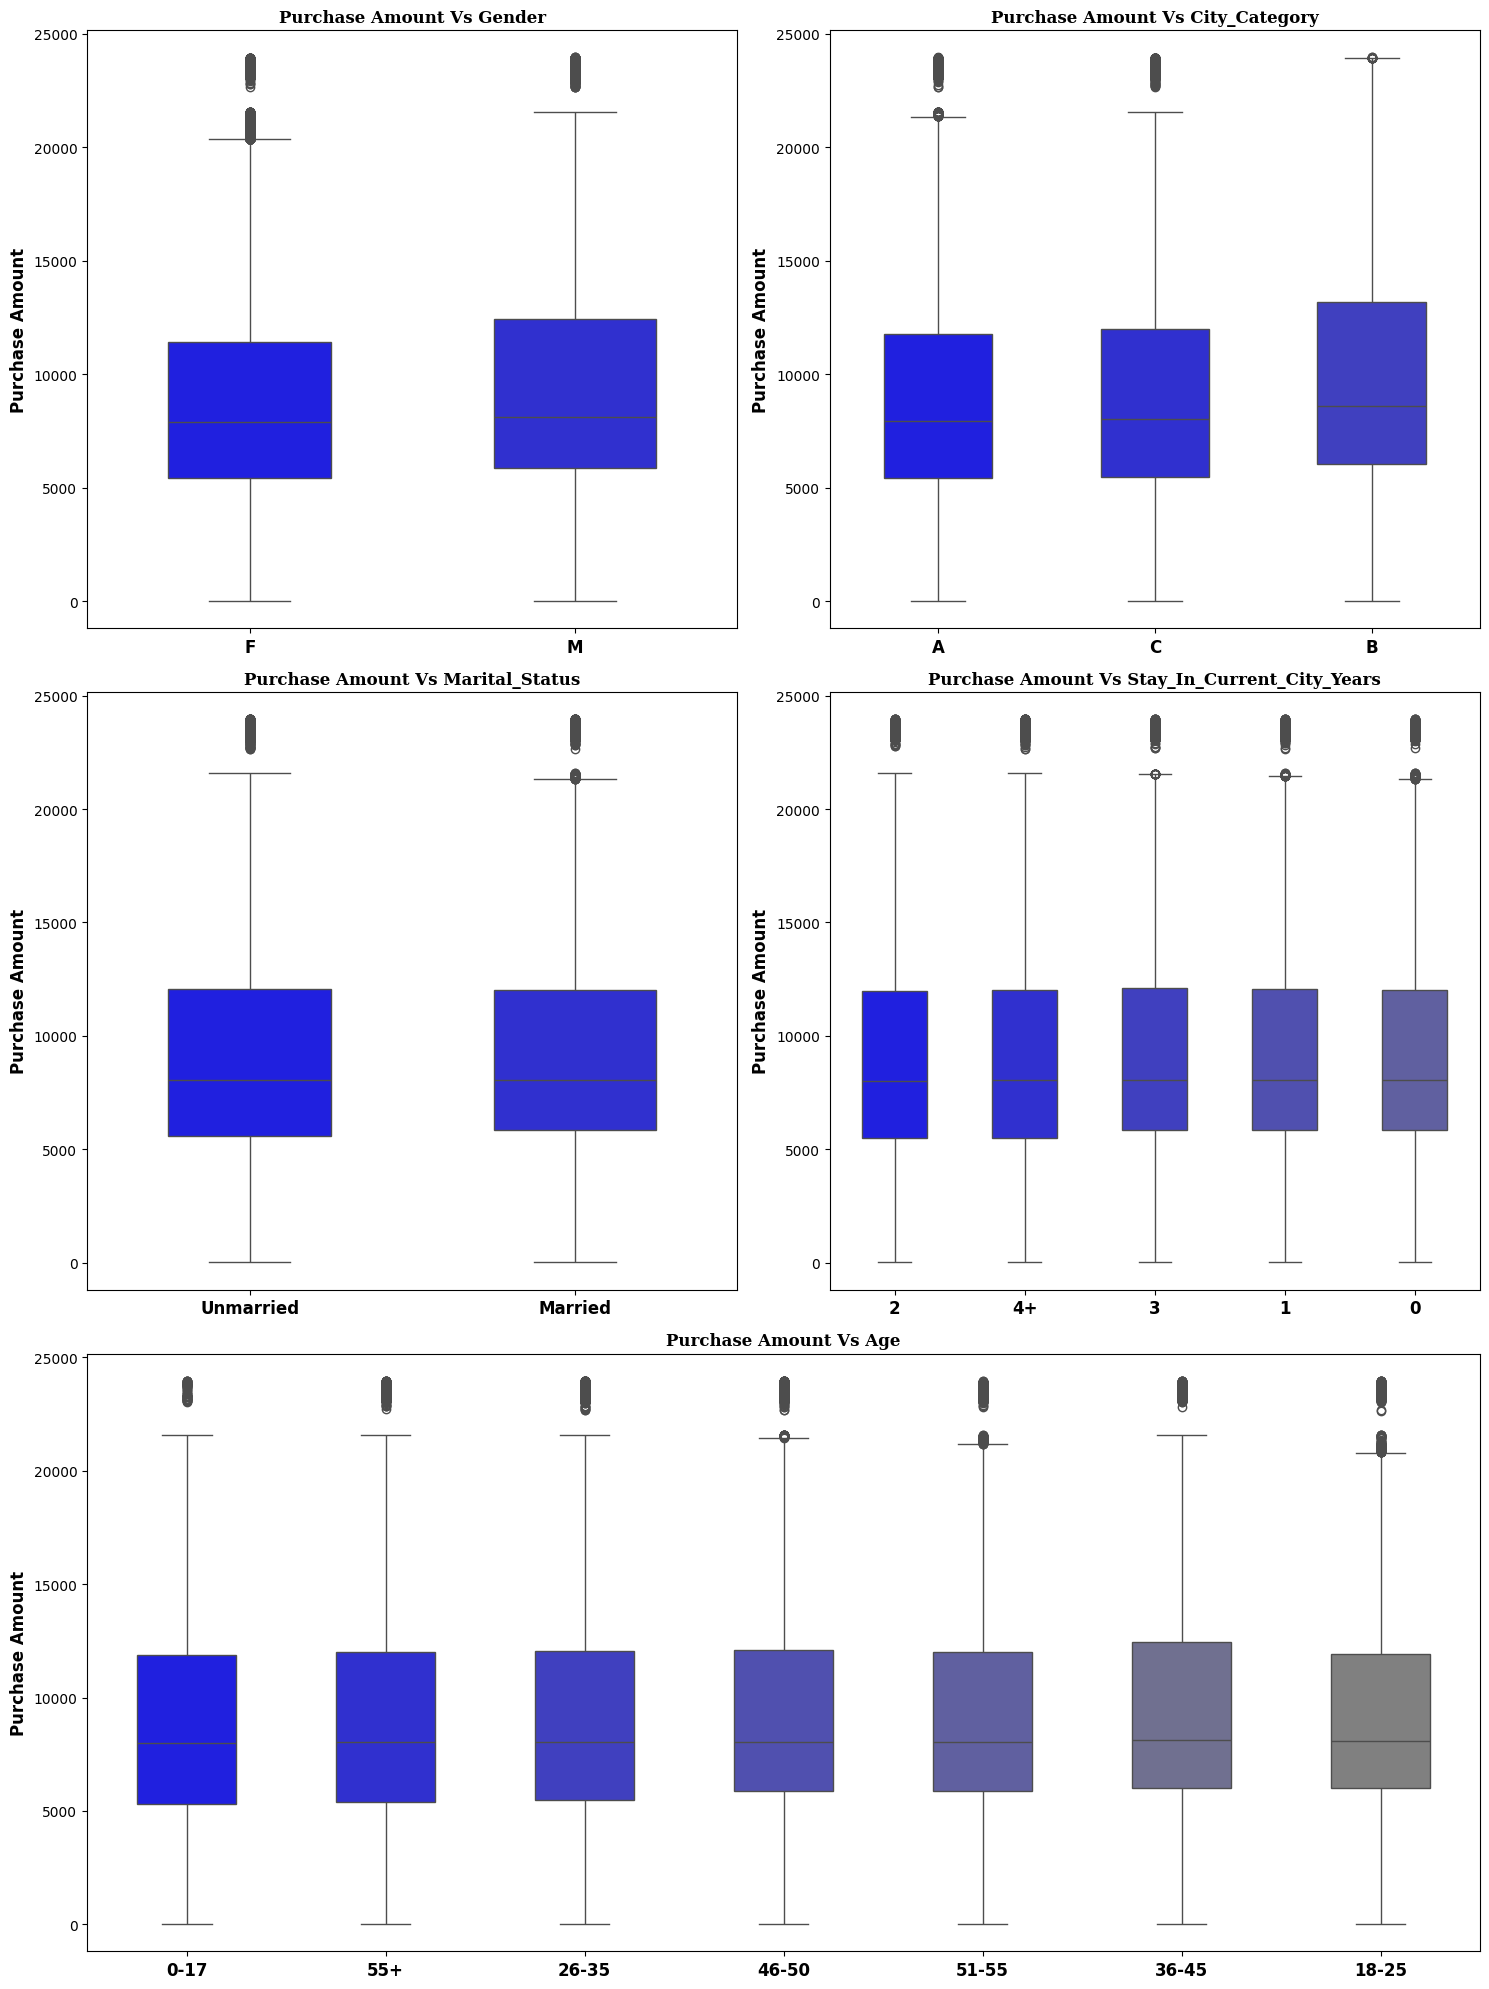

In [ ]:
fig = plt.figure(figsize=(15, 20))
gs = fig.add_gridspec(3, 2)

for i, j, k in [(0, 0, 'Gender'), (0, 1, 'City_Category'), (1, 0, 'Marital_Status'), (1, 1, 'Stay_In_Current_City_Years'), (2, 0, 'Age')]:
    if i == 2:
        ax0 = fig.add_subplot(gs[i, :])
    else:
        ax0 = fig.add_subplot(gs[i, j])

    color_map = sns.blend_palette(["blue", "grey"], n_colors=7)
    sns.boxplot(data=df, x=k, y='Purchase', ax=ax0, width=0.5, palette=color_map)

    ax0.set_title(f'Purchase Amount Vs {k}', fontname='serif', fontsize=12, weight='bold')

    ax0.set_xticklabels(df[k].unique(), fontweight='bold', fontsize=12)
    ax0.set_ylabel('Purchase Amount', fontweight='bold', fontsize=12)
    ax0.set_xlabel('')

plt.tight_layout()
plt.show()

Insights: Among all the variables analyzed above, it is noteworthy that the purchase amount remains **relatively consistent** across different factors. According to the data, the **median purchase amount** consistently stays around **8,000 USD**, regardless of the variable under consideration.

## Gender Vs. Purchase Amount

In [ ]:
temp = df.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)
temp['per_purchase'] = round(temp['sum']/temp['count'])
temp['Gender'] = temp['Gender'].replace({'F':'Female','M':'Male'})

temp

,Gender,sum,count,sum_in_billions,%sum,per_purchase
0,Female,1186232642,135809,1.19,0.233,8735.0
1,Male,3909580100,414259,3.91,0.767,9438.0


Insights:
**Total Sales and Transactions Comparison**:
The total purchase amount and the number of transactions made by male customers were more than three times that of female customers, highlighting their greater contribution to Black Friday sales.

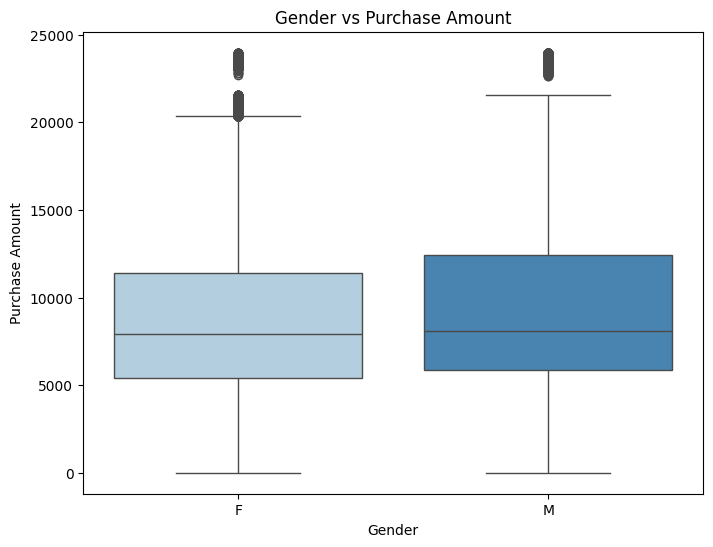

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Purchase', palette='Blues')
plt.title('Gender vs Purchase Amount')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

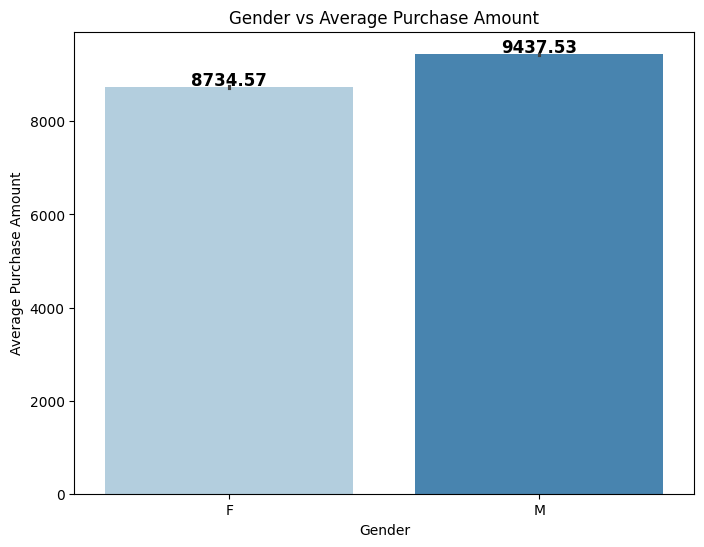

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='Gender', y='Purchase', palette='Blues')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, fontweight='bold', color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Gender vs Average Purchase Amount')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')

plt.show()

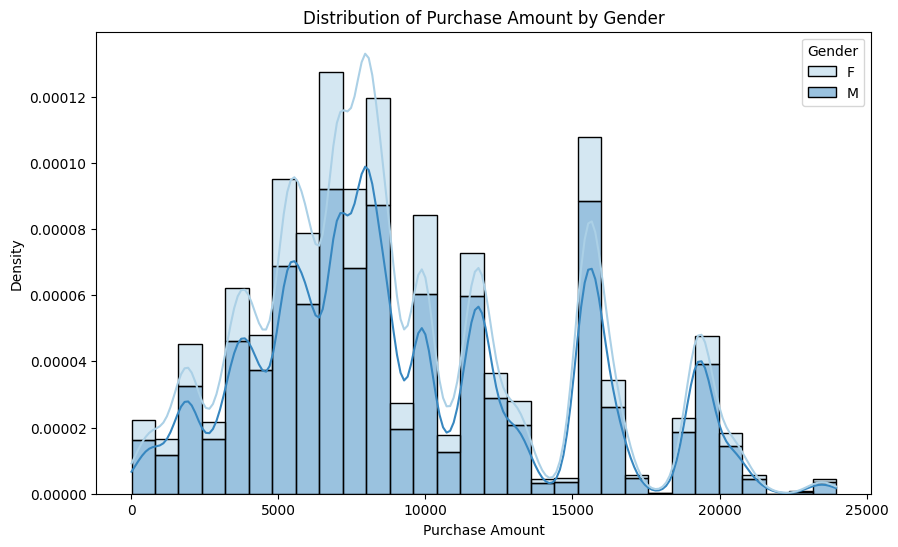

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', hue='Gender', kde=True, bins=30, stat='density', palette='Blues', multiple="stack")
plt.title('Distribution of Purchase Amount by Gender')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.show()


Insights:
**Average Transaction Value**
- The average purchase amount per transaction was slightly higher for male customers than female customers `($9438 vs $8735)`.

**Distribution of Purchase Amount**
- As seen above, the purchase amount for both the genders is `not normally distributed`.

Are women spending more money per transaction than men? Why or Why not?

In [ ]:
df_male = df[df['Gender'] == 'M']['Purchase']
df_female = df[df['Gender'] == 'F']['Purchase']

mean_male = df_male.mean()
mean_female = df_female.mean()

print(f"Mean purchase for male customers: {mean_male}")
print(f"Mean purchase for female customers: {mean_female}")

def confidence_interval(data, ci=95):
    l_ci = (100 - ci) / 2
    u_ci = (100 + ci) / 2
    interval = np.percentile(data, [l_ci, u_ci])
    return interval

male_ci = confidence_interval(df_male, 95)
female_ci = confidence_interval(df_female, 95)

print(f"95% confidence interval for male purchases: {male_ci}")
print(f"95% confidence interval for female purchases: {female_ci}")



Mean purchase for male customers: 9437.526040472265
Mean purchase for female customers: 8734.565765155476
95% confidence interval for male purchases: [ 1436. 19925.]
95% confidence interval for female purchases: [ 1376. 19648.]


**Confidence intervals and distribution of the mean of the expenses by female and male customers**

In [ ]:
male_mean = df_male.mean()
female_mean = df_female.mean()

t_stat, p_value = ttest_ind(df_male, df_female, equal_var=False)
print(f"Mean purchase for male: {male_mean}, Female: {female_mean}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in the spending behavior between males and females.")
else:
    print("There is no significant difference in the spending behavior between males and females.")


Mean purchase for male: 9437.526040472265, Female: 8734.565765155476
T-statistic: 46.358248669626064, P-value: 0.0
There is a significant difference in the spending behavior between males and females.


**Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

In [ ]:
male_ci = confidence_interval(df_male, 95)
female_ci = confidence_interval(df_female, 95)

t_stat, p_value = ttest_ind(df_male, df_female, equal_var=False)
print(f"95% CI for male: {male_ci}, Female: {female_ci}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between male and female spending.")
else:
    print("The confidence intervals overlap, meaning there is no significant difference.")


95% CI for male: [ 1436. 19925.], Female: [ 1376. 19648.]
T-statistic: 46.358248669626064, P-value: 0.0
There is a significant difference between male and female spending.


The confidence intervals for male and female spending do not overlap, and the statistical test (t-test) confirms a significant difference in their spending. Therefore, the result shows that male and female spending differ significantly during the Black Friday event.

How Walmart Can Leverage This:

Targeted Marketing: Walmart could create gender-specific campaigns to appeal to the different spending behaviors observed. For instance, personalized promotions for males and females might increase engagement and sales.

Product Offering Adjustments: If the differences in spending behavior are linked to certain product categories, Walmart could tailor its product offerings to better cater to the preferences of each gender.

Improved Discounts: Given that males and females differ in spending amounts, Walmart could introduce exclusive discounts or bundles for either group to maximize sales during future events.

Customer Engagement Strategies: Understanding these gender-specific spending habits allows Walmart to design customized loyalty programs or incentives for each group to encourage higher spending.

**Purchase comparision between for Married vs Unmarried**

In [ ]:
df_married = df[df['Marital_Status'] == 'Married']['Purchase']
df_unmarried = df[df['Marital_Status'] == 'Unmarried']['Purchase']

t_stat, p_value = ttest_ind(df_married, df_unmarried, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between married and unmarried spending.")
else:
    print("There is no significant difference between married and unmarried spending.")


T-statistic: -0.34379905124865934, P-value: 0.7309975627344574
There is no significant difference between married and unmarried spending.


Insights: The T-test results (T-statistic: -0.344, P-value: 0.731) indicate that there is no significant difference in the average spending between married and unmarried customers. With a p-value greater than 0.05, we conclude that marital status does not have a meaningful impact on Black Friday spending. Walmart may not need to tailor spending strategies based on marital status but could focus on other factors like age or gender to optimize marketing efforts.

### Age-Wise Analysis of Purchase Amounts: ANOVA Test with Confidence Intervals and Distribution Visualization

In [ ]:
from scipy.stats import t
age_groups = ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
grouped_stats = df.groupby('Age')['Purchase'].agg(['mean', 'count', 'std']).reindex(age_groups)
grouped_stats['sem'] = grouped_stats['std'] / np.sqrt(grouped_stats['count'])
confidence = 0.95
grouped_stats['ci'] = grouped_stats['sem'] * t.ppf((1 + confidence) / 2, grouped_stats['count'] - 1)
print(grouped_stats)

              mean   count          std        sem         ci
Age                                                          
0-17   8933.464640   15102  5111.114046  41.590902  81.523204
55+    9336.280459   21504  5011.493996  34.174926  66.985396
26-35  9252.690633  219587  5010.527303  10.692521  20.957072
46-50  9208.625697   45701  4967.216367  23.235404  45.541761
51-55  9534.808031   38501  5087.368080  25.927292  50.818156
36-45  9331.350695  110013  5022.923879  15.143790  29.681611
18-25  9169.663606   99660  5034.321997  15.947057  31.256037


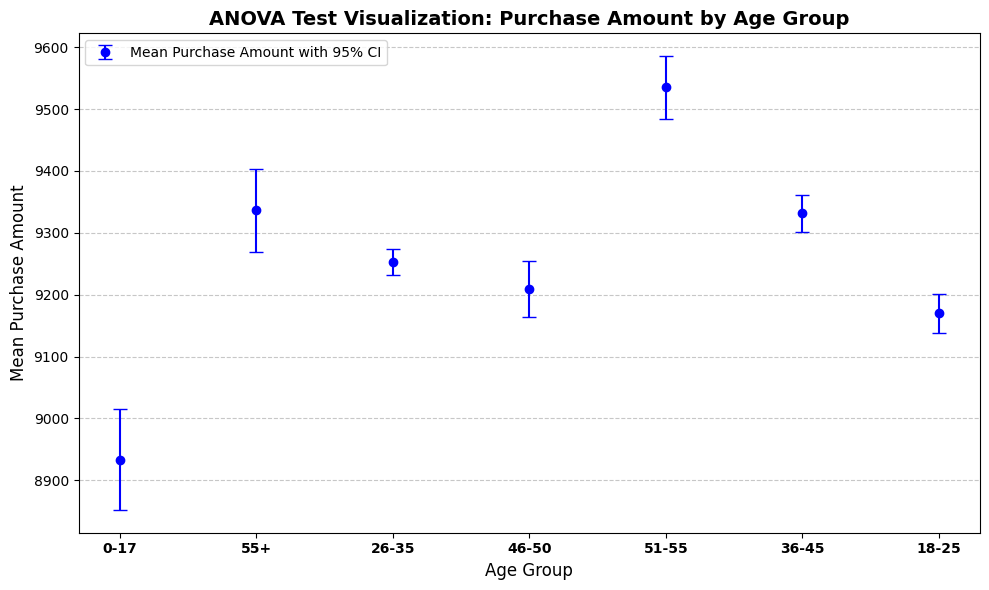

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(
    grouped_stats.index,
    grouped_stats['mean'],
    yerr=grouped_stats['ci'],
    fmt='o',
    capsize=5,
    color='b',
    label='Mean Purchase Amount with 95% CI'
)

plt.title('ANOVA Test Visualization: Purchase Amount by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Mean Purchase Amount', fontsize=12)
plt.xticks(fontsize=10, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

From the given plot of mean purchase amounts with 95% confidence intervals for different age groups, here are the insights:

Variation Across Age Groups:
Different age groups show noticeable variation in their mean purchase amounts. For instance:
Groups like 26-35 and 36-45 appear to have higher mean purchase amounts.
Groups such as 0-17 and 18-25 seem to have the lowest mean purchase amounts.

Confidence Interval Width:
The confidence intervals for some groups, such as 26-35, are relatively narrow, indicating less variability in purchase amounts within this group.
Wider confidence intervals, as seen for 55+, suggest more variability or a smaller sample size for that age group.

Overlapping Confidence Intervals:
Confidence intervals for some age groups overlap, which indicates that their differences might not be statistically significant. For instance:
36-45 and 26-35 appear to have overlapping intervals.
0-17 and 18-25 also show overlap, suggesting similar purchase behavior.

Key Age Groups:
Age groups 26-35 and 36-45 likely contribute significantly to total sales due to higher average purchase amounts.
Younger groups (0-17 and 18-25) and older groups (55+) contribute less, which may indicate lower purchasing power or lesser interest in the products.

In [ ]:
from scipy.stats import f_oneway
import pandas as pd

grouped_data = df.groupby("Age")["Purchase"].apply(list)
anova_result = f_oneway(*grouped_data)

f_statistic = anova_result.statistic
p_value = anova_result.pvalue

print(f"ANOVA Test Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Conclusion: There is a significant difference in the mean purchase amounts among the age groups (p < 0.05).")
else:
    print("Conclusion: There is no significant difference in the mean purchase amounts among the age groups (p ≥ 0.05).")


ANOVA Test Results:
F-statistic: 40.5758
P-value: 0.0000
Conclusion: There is a significant difference in the mean purchase amounts among the age groups (p < 0.05).


Insights: The ANOVA test indicates a significant difference in mean purchase amounts across age groups (F-statistic: 40.5758, p-value: 0.0000). This suggests that age strongly influences spending behavior, with some groups spending more on average than others. Walmart can leverage this insight by tailoring marketing campaigns, age-specific promotions, and product offerings to better target high-spending groups while engaging underperforming segments.

In [ ]:
occupation_data = df.groupby('Occupation')['Purchase'].apply(list)
anova_result_occupation = f_oneway(*occupation_data)

city_category_data = df.groupby('City_Category')['Purchase'].apply(list)
anova_result_city = f_oneway(*city_category_data)

stay_in_city_data = df.groupby('Stay_In_Current_City_Years')['Purchase'].apply(list)
anova_result_stay = f_oneway(*stay_in_city_data)

# Extracting F-statistics and P-values
print(f"Occupation - F-statistic: {anova_result_occupation.statistic:.4f}, P-value: {anova_result_occupation.pvalue:.4f}")
print(f"City Category - F-statistic: {anova_result_city.statistic:.4f}, P-value: {anova_result_city.pvalue:.4f}")
print(f"Stay in Current City - F-statistic: {anova_result_stay.statistic:.4f}, P-value: {anova_result_stay.pvalue:.4f}")


Occupation - F-statistic: 98.4738, P-value: 0.0000
City Category - F-statistic: 1130.7460, P-value: 0.0000
Stay in Current City - F-statistic: 9.3827, P-value: 0.0000


Insights:
The ANOVA test results show significant differences in purchase amounts across the different categories of Occupation, City Category, and Stay In Current City.

**Occupation**:
F-statistic: 98.4738, P-value: 0.0000
Conclusion: The F-statistic is significantly high, and the p-value is 0.0000, which is much lower than the 0.05 threshold. This suggests that there is a significant difference in the average purchase amounts across different occupation categories. Some occupations are likely spending more than others, and this can inform targeted marketing strategies.

**City Category**:
F-statistic: 1130.7460, P-value: 0.0000
Conclusion: The extremely high F-statistic and the p-value of 0.0000 indicate that the city in which customers reside significantly influences their purchasing behavior. This means that customers from different cities have noticeably different average spending patterns. Walmart could benefit from tailoring their marketing strategies and offers based on city-specific characteristics and preferences.

**Stay In Current City**:
F-statistic: 9.3827, P-value: 0.0000
Conclusion: The F-statistic is less extreme compared to the first two tests, but still, with a p-value of 0.0000, it indicates that the length of time a customer has stayed in the current city does impact their spending habits. This may suggest that long-term residents might have more disposable income or loyalty, and Walmart could use this information to personalize offers for new vs. long-term residents.

**Key Takeaways**:
Occupation and City Category have the most significant impact on purchase amounts, with clear differences in spending patterns.
Stay In Current City also plays a role in spending, but its effect is less pronounced than occupation or city category.
Walmart could use these insights to develop region-based or occupation-targeted marketing campaigns, as well as create tailored promotions for customers based on how long they’ve lived in their current location.

## Recommendations

### 1. **Target Male Shoppers**
- Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

### 2. **Focus on 26 - 45 Age Group**
- With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic. This could include offering exclusive deals on products that are popular among this age group.

### 3. **Engage Younger Shoppers**
- Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.

### 4. **Customer Segmentation**
- Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

### 5. **Enhance the 51 - 55 Age Group Shopping Experience**
- Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart can offer them exclusive pre-sale access, special discounts, or personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 - 55 age group.

### 6. **Post-Black Friday Engagement**
- After Black Friday, Walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase customer retention and encourage repeat business throughout the holiday season and beyond.
